# Assignment 5

In this assignment you will do sampling and quantization. 
You know from Signals and Systems and DSP courses that you cannot represent a continuous-time signal on a digital computer. Instead, you should sample in time to get a discrete-time signal.

Similarly, you cannot exactly represent the amplitude of a given sample on a digital computer, since you only have a limited number of bits for that representation. If we have $b+1$ bits in two's complement notation, you can only have $2^b$ possible values for the amplitude (since 1 bit will be assigned for the sign of the number). But if $b$ is large enough, or if you have a computer that has a floating-point implementation, the approximate value will most likely be good enough for general applications.

However, on a smaller, lower cost platform, such as a fixed-point DSP chip, you will limited to a much smaller set of possible amplitude values. This process of reducing an infinite set of values to a finite set is called quantization. 

If you want to learn more about signed-unsigned binary number, fixed point and floating point representations you can look at: https://www3.ntu.edu.sg/home/ehchua/programming/java/datarepresentation.html

You will do quantization in this assignment, to simplify process you will quantize signals in $-1$ and $1$ range. You will write two functions, first one is for quantizing and second one is for coding.
    
Suppose you have a sinusoidal signal $x(t)=sin(2\pi t)$ and you will convert it to a digital signal. There are basically three steps to accomplish this task: sampling $x(nT_s)=x[n]$, quantizing $Q_B[x]$ and coding. For this example, assume that $3$ bits will be used to represent values in the digital signal, therefore it means the quantization step $\Delta=2^{-b}=2^{-2}$, $N=2^2$:

 In the quantizer($x$,N,$\delta$, qtype) function, you will break the signal amplitudes according to the quantization step: 
1. Normalize the signal to fall into the range $(-1+\frac{\Delta}{2})<x[n]<(1-\frac{\Delta}{2})$.
    Hint : Remember if you're trying to put all data within a custom range where the lowest value is a and the highest value is b: xnormalized = a + ( ((x - xminimum) * (b - a)) / range of x)
    
2. Multiply the normalized signal by $N$ . 
   
3. If qtype='round' then round the sample values to the nearest integer. If qtype='truncate',then truncate the sample values to the nearest integer, otherwise give error. 
4. Divide by $N$.
    
In coding part, you will write a function that will take the quantized values of the signal and convert them to a binary number  for a digital system to store. Since you will have $3$ bits in two's complement format:

| Value | Code |
| :- | :-|
| $$0$$ | $$000$$ |
| $$0.25$$| $$001$$ |
| $$0.5$$ | $$010$$ |
| $$0.75$$ | $$011$$ |
| $$-0.25$$| $$111$$ |
| $$-0.5$$ | $$110$$ |
| $$-0.75$$ | $$101$$ |
| $$-1$$  | $$100$$ |


First write the quantizer and coder functions using the template given below. After that, using those functions, sample, quantize and code $x(t)=sin(2\pi t)$ and plot $x(t)$ (obviously it is not a continous time signal but we will pretend it as continous by selecting number of samples in one period), sampled signal $x[n]$ and $Q_B[x]$ which is quantized signal of $x(t)$ and finally the error signal $e[n]$. The error introduced by the quantization is given as:
$$e[n]= Q_B[x[n]]- x[n] $$

Remember we can select either rounding or truncation in the quantization process. So first do with rounding and then truncation. Plot the original signal and the quantized signal in the same plot for each case. Plot the error signal. Print the coded signal.  

Coded Signal for Truncated
 
['000', '000', '000', '000', '000', '001', '001', '001', '001', '001', '010', '010', '010', '010', '010', '010', '010', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '010', '010', '010', '010', '010', '010', '010', '001', '001', '001', '001', '001', '000', '000', '000', '000', '000', '000', '000', '000', '000', '111', '111', '111', '111', '111', '110', '110', '110', '110', '110', '110', '110', '101', '101', '101', '101', '101', '101', '101', '101', '101', '101', '101', '101', '101', '101', '101', '101', '101', '110', '110', '110', '110', '110', '110', '110', '111', '111', '111', '111', '111', '000', '000', '000', '000', '000', '000', '000', '000', '000', '001', '001', '001', '001', '001', '010', '010', '010', '010', '010', '010', '010', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '011', '010', '010', '010', '010', '010

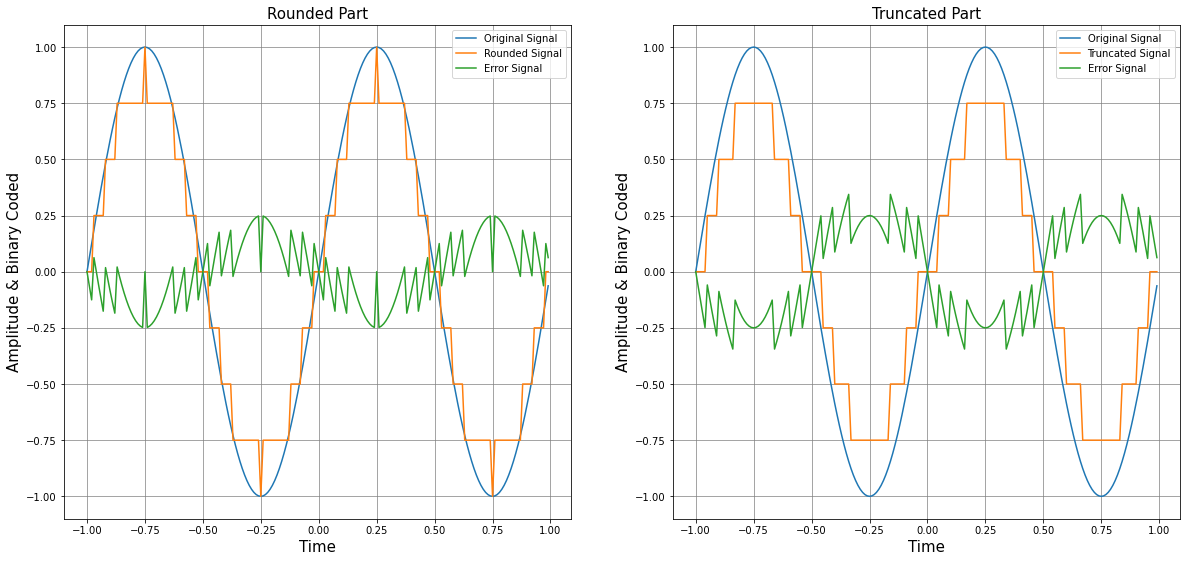

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
n=np.arange(-1,1,0.01)
x=np.sin(np.pi*2*n)

def quantizer(x, N, delta, qtype):
    # Normalize the signal
    a = -1 + delta / 2
    b = 1 - delta / 2
    x_norm = a + (x - x.min()) * (b - a) / (x.max() - x.min())

    # Quantize the signal
    x_quantized = x_norm * N

    # Truncate or round the quantized signal, depending on the qtype argument
    if qtype == 'round':
        x_quantized = np.round(x_quantized)
    elif qtype == 'truncate':
        x_quantized = np.trunc(x_quantized)
    else:
        print('Invalid value for qtype argument')

    # Divide by N to obtain the final quantized signal
    x_quantized = x_quantized / N
    
    return x_quantized
def coder(x_quantized, delta):
   
    xcoded=[]
    for x in x_quantized:
        if (-4*delta<=x<-3.5*delta):

            xcoded.append("100")
        elif (-3.5*delta<=x<-2.5*delta):

            xcoded.append("101")
        elif (-2.5*delta<=x<-1.5*delta):

            xcoded.append("110")
        elif (-1.5*delta<=x<-0.5*delta):

            xcoded.append("111")
        elif (-0.5*delta<=x<0.5*delta):

            xcoded.append("000")
        elif (0.5*delta<=x<1.5*delta):

            xcoded.append("001")
        elif (1.5*delta<=x<2.5*delta):

            xcoded.append("010")
        elif (2.5*delta<=x<3.5*delta):

            xcoded.append("011")

    return xcoded

def quantization_error(x, x_quantized):
    # Calculate the quantization error at each time step
    error = x_quantized - x

    return error
# Quantize the signal

x_quantized_round = quantizer(x, N=4, delta=1/4, qtype='round')
x_coded_round=coder(x_quantized_round,delta=0.25)
err_round=quantization_error(x, x_quantized_round)

x_quantized_trun = quantizer(x, N=4, delta=1/4, qtype='truncate')
x_coded_trun=coder(x_quantized_trun,delta=0.25)
err_trun=quantization_error(x, x_quantized_trun)


print("Coded Signal for Truncated")
print(" ")
print(x_coded_trun)
print(" ")
print("Coded Signal for Rounded")
print(" ")
print(x_coded_round)

plt.subplot(2,2,1)
plt.title('Rounded Part',size=15)
plt.xlabel('Time',size=15)
plt.ylabel('Amplitude & Binary Coded',size=15)
plt.plot(n,x,label="Original Signal")
plt.plot(n,x_quantized_round,label="Rounded Signal")
plt.plot(n,err_round,label="Error Signal")
plt.legend(loc='upper right')
plt.grid(color = 'gray', linestyle = '-', linewidth = 0.7)

plt.subplot(2,2,2)
plt.title('Truncated Part',size=15)
plt.xlabel('Time',size=15)
plt.ylabel('Amplitude & Binary Coded',size=15)
plt.plot(n,x,label="Original Signal")
plt.plot(n,x_quantized_trun,label="Truncated Signal")
plt.plot(n,err_trun,label="Error Signal")
plt.legend(loc='upper right')
plt.grid(color = 'gray', linestyle = '-', linewidth = 0.7)

plt.show()



What are differences in error signals in rounding and truncation cases? Explain. 

Why are we normalizing the signal in the begining of the quantization process? Hint: Think overflow issues when adding or multiplying two numbers when they are integers and when they are all-fraction. Research on Two's Complement 1.15 (Q15) format.

The difference between rounding and truncation in the quantization process is that rounding will approximate the sample values to the nearest integer, while truncation will simply remove any fractional part of the sample values. This means that the error introduced by rounding will generally be smaller than the error introduced by truncation, since the rounded values will be closer to the original values.

Normalizing the signal at the beginning of the quantization process ensures that the signal values are within a specific range, which can prevent overflow issues when multiplying or adding numbers. For example, if the signal values are not normalized and are represented as integers, they may have a larger range than the number of bits available for their representation. This can cause overflow when multiplying or adding the values, resulting in incorrect quantization.

In the case of Two's Complement 1.15 (Q15) format, the signal is normalized to the range (-1+Δ/2) to (1-Δ/2), where Δ is the quantization step. This range is chosen because it allows for the representation of both positive and negative values using two's complement notation, and it ensures that the signal values do not exceed the maximum value that can be represented using 15 bits.